<img src='https://weclouddata.com/wp-content/uploads/2016/11/logo.png' width='30%'>
-------------

<h3 align='center'> Applied Machine Learning Course - Assignment Week 2 </h3>
<h1 align='center'> Iris Dataset Classification </h1>

<br>
<center align="left"> Developed by:</center>
<center align="left"> WeCloudData Academy </center>


<h2>Background</h2>

In this assignment, we will practice some advanced Logistic Regression technique on the famous [iris dataset](#https://archive.ics.uci.edu/ml/datasets/iris).

This is perhaps the best known database to be found in the machine learning literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: **class of iris plant**. 

This is an exceedingly simple domain. 

<h2>Data Description</h2>

<b>Features:</b>
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 


<b>Target Value:</b>

- class: 
  1. Iris Setosa 
  2. Iris Versicolour 
  3. Iris Virginica

## $\Omega$ 1: Explore the Training Data

In [1]:
# Import necessary libraries (numpy, sklearn, matplotlib) and 

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='ticks', palette='Set2')
%matplotlib inline

- Step 1: Load the iris dataset from sklearn into a variable called `data`.

  - Hint: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
  - We have used similar technique to load the wine dataset in the in-class lab.

In [2]:
# Step 1
data = datasets.load_iris()

- Step 2: Explore the dataset

  - Figure out how many features there are and how many classes there are in the dataset

In [3]:
# Step 2

X = data.data
y = data.target
features = data.feature_names
target_names = data.target_names

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'{len(features)} features: {features}')
print(f'{len(target_names)} unique targets: {target_names}')

# print('X.shape: {X.shape}')

X.shape: (150, 4)
y.shape: (150,)
4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
3 unique targets: ['setosa' 'versicolor' 'virginica']


- Step 3: Explore class distribution

  - Find out how many samples there are for each target class.
  - Visualize 2D feature distribution on this dataset (hint: we used similar techniques in the in-class lab)

In [4]:
# Step 3

def visualize_2d(feature_indices, all_feature_names, target_names, X, y):
    series = []
    # target_names=['class_0' 'class_1' 'class_2']
    # targets=[0,1,2]
    # assuming `feature_indices` contain two elements
    idx1 = feature_indices[0]
    idx2 = feature_indices[1]
    colors = ['b', 'r', 'g']
    for i in range(len(target_names)):
        # for each target ("class_0", "class_1", "class_2")
        # we create a scatter plot
        target_indices = np.where(y == i)[0] # find the indices of data where the target == i
        series.append(plt.scatter(X[target_indices, idx1], X[target_indices, idx2], c=colors[i]))
        
    plt.xlabel(all_feature_names[idx1]) # x-axis represents the first feature value
    plt.ylabel(all_feature_names[idx2]) # y-axis represents the second feature value
    plt.legend(series, target_names)
    sns.despine()

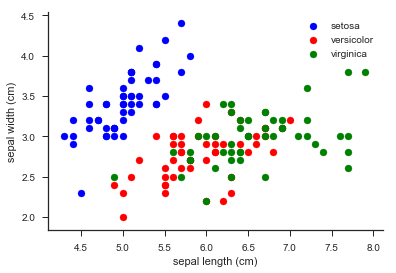

In [5]:
visualize_2d(feature_indices=[0, 1], all_feature_names=features, target_names=target_names, X=X, y=y)

In [6]:
from collections import defaultdict

target2cnt = defaultdict(int)
for target in y:
    target2cnt[target_names[target]] += 1
    
for target, cnt in target2cnt.items():
    print(f'{target}\t{cnt}')

setosa	50
versicolor	50
virginica	50


## $\Omega$ 2: Prepare Training and Testing Data

- <b>Step 1</b>

  - Use the 'train_test_split' function in scikit learn to split X and y into 80% Traning data and 20% Testing Data
  
  - Hint: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
# Step 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- <b>Step 2</b>

  - Perform feature standardization on `X_train` by using sklearn's `StandardScaler`, and use the same standardizer to standardize `X_test`.
  - Hint: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [8]:
# Step 2

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- <b>Step 3</b>

  - Repeat the data visualization you did in `Step 3: Explore class distribution` above on the training and test data (`X_train` and `X_test`) after the standardization

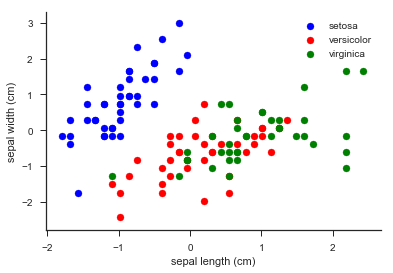

In [9]:
# Step 3

visualize_2d(feature_indices=[0, 1], all_feature_names=features, target_names=target_names, X=X_train, y=y_train)

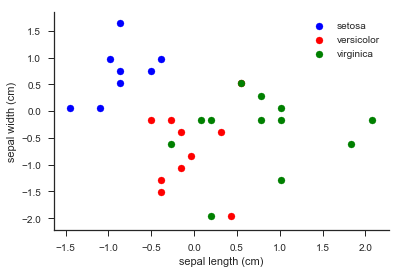

In [10]:
visualize_2d(feature_indices=[0, 1], all_feature_names=features, target_names=target_names, X=X_test, y=y_test)

## $\Omega$ 3: Multi-class Logistic Regression </h3>

We have practiced about performing binary classification using Logistic Regression. However, Logistic Regression can also perform multi-class classification.

- <b>Step 1</b>
  - Create a Logistic Regression model - 'lr' and fit X_train and Y_train to train it. Do you think there is any special setup you need to do for making this Logistic Regression classifier capable of performing multi-class classification?
  - Hint: Look at the function doc at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

- <b>Step 2</b>
  - Import classification_report and accuracy_score from sklearn.metrics.classification to evaluate our classifier
  - Use lr.predict on X_test to get predicted value of y and call classification_report(y_test, y_predict) to get generate the classification report.
  - Call accuracy_score to get the prediction accuracy.

In [13]:
from sklearn.metrics.classification import classification_report, accuracy_score

y_preds = lr.predict(X_test)
print(classification_report(y_preds, y_test))
print('accuracy: %.1f%%' % round(accuracy_score(y_preds, y_test) * 100.0))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.70      0.88      0.78         8
          2       0.92      0.79      0.85        14

avg / total       0.88      0.87      0.87        30

accuracy: 87.0%


- <b>Step 3</b>
  - What's your model's performance (using the same set of metrics as in Step 2) on the `training` data? This is to understand whether our model is underfitting or not, i.e., if the training performance is not almost perfect, it is an indicator that our model is not expressive enough to represent the variance in the training data.

In [14]:
y_train_preds = lr.predict(X_train)
print(classification_report(y_train_preds, y_train))
print('training accuracy: %.1f%%' % round(accuracy_score(y_train_preds, y_train) * 100.0))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.85      0.94      0.89        36
          2       0.95      0.86      0.90        42

avg / total       0.94      0.93      0.93       120

training accuracy: 93.0%


## $\Omega$ 4: Model generality </h3>

Logistic Regression in scikit-learn has regularization built in. It comes with many different variants, depending on the particular optimization solver and so on. But roughly speaking, there is a parameter $C$ which controls the strength of the regularization.

According to scikit-learn's documentation, this parameter $C$ is:

``` Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.```

Roughly speaking, the cost function has either one of the following forms:

<center>

$J_\theta=\sum_{i=1}^{m} (\hat{y}^{(i)}-y^{(i)}) + \frac{1}{C} \times ||{\theta}||$ (using l1 norm)
</center>
or,
<center>
$J_\theta=\sum_{i=1}^{m} (\hat{y}^{(i)}-y^{(i)}) + \frac{1}{C} \times ||{\theta}||^2$ (using l2 norm)
</center>

In this exercise, we will experiment with using different $C$ values, and find the optimal $C$ value on a validation set. Then we use the model built with this optimal $C$ value to perform prediction on the test set.

- Step 1:
  - Further split the current training set to be 80% actual training set (`X_t` and `y_t`) and 20% validation set (`X_val` and `y_val`). 

In [16]:
# Step 1

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.2)

- Step 2:
  - For each $C$ value in this set: $[0.001, 0.01, 0.1, 1, 5, 10, 50, 100]$, fit a LogisticRegression model `lr` with this $C$ value on `X_t` and `y_t`, and use `lr` to predict `X_val`. Keep track of  the accuracy score on the training set (`X_t` and `y_t`) and validation set (`X_val` and `y_val`).
  - Report the $C$ value which achieves the best validation accuracy score.


In [17]:
# Step 2
candidate_c = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
train_accs = []
val_accs = []

for c in candidate_c:
    lr = LogisticRegression(C=c)
    lr.fit(X_t, y_t)
    train_accs.append(accuracy_score(lr.predict(X_t), y_t))
    val_accs.append(accuracy_score(lr.predict(X_val), y_val))
    
# sort val_accs to find the best val accuracy and the corresponding c value which achieves the best val accuracy
best_c_idx, best_val_acc = sorted(enumerate(val_accs), key=lambda x : x[1], reverse=True)[0]
best_c = candidate_c[best_c_idx]

print(f'Best validation accuracy %.1f is achieved using c=%.3f' % (best_val_acc * 100.0, best_c))

Best validation accuracy 91.7 is achieved using c=5.000


- Step 3:
  - Plot a curve of training accuracies vs. different $C$ value and a similar curve of validation accuracies vs. different $C$ value.

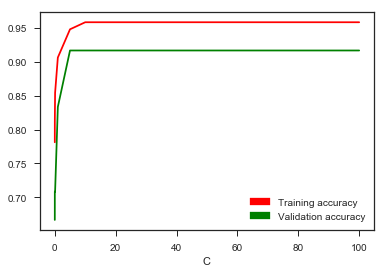

In [18]:
import matplotlib.patches as mpatches

plt.plot(candidate_c, train_accs, c='r') # the precision curve
plt.plot(candidate_c, val_accs, c='g') # the recall curve

y = np.linspace(0.8, 1, 100)

plt.xlabel('C')
train_patch = mpatches.Patch(color='red', label='Training accuracy')
val_patch = mpatches.Patch(color='green', label='Validation accuracy')
plt.legend(handles=[train_patch, val_patch])

- Step 4: Use the optimal value of $C$ you found in step 2 to train a new Logistic Regression classifier `lr` on the combination of `X_t` and `X_val` (i.e., the original `X_train`) and test your new model on the test data `X_test` and `y_test`. Report the performance now and compare with that you obtained in [Multi-class Logistic Regreesion]($\Omega$-3:-Multi-class-Logistic-Regression-) section.

In [19]:
# Step 4

lr = LogisticRegression(C=5.0)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
print(classification_report(y_preds, y_test))
print('test accuracy: %.1f%%' % round(accuracy_score(y_preds, y_test) * 100.0))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.90      0.90      0.90        10
          2       0.92      0.92      0.92        12

avg / total       0.93      0.93      0.93        30

test accuracy: 93.0%


## $\Omega$ 5 (Advanced): Implement gradient descent on Logistic Regression</h3>

- Under the hood, Scikit-learn is already using regularization (via $C$ value) and gradient descent based method to to fit LogisticRegression.

- Therefore, you have been enjoying the simple life of fitting a LogisticRegression classifier by calling sklearn directly. 

- In this step, you can challenge yourself to implement the most vanilla version of training a logistic regression by gradient descent, i.e., **no regularization**.

- However, this dataset is a **multi-class** dataset, and it requires special care to perform multi-class classification. Therefore, let's first transform this dataset into a binary classification dataset by merging the last two classes. The code for this part is provided to you.

- For more info on multi-class logistic regression, see https://cedar.buffalo.edu/~srihari/CSE574/Chap4/4.3.4-MultiLogistic.pdf![image.png](attachment:image.png)

In [20]:
for y in [y_train, y_test]:
    class_1_idx = np.where(y==1)
    class_2_idx = np.where(y==2)
    y[class_1_idx] = 1
    y[class_2_idx] = 1

# confirm there are only two classes in `y_train` and `y_test` now:
print(f'unique values in y_train: {np.unique(y_train)}')
print(f'unique values in y_test: {np.unique(y_test)}')

unique values in y_train: [0 1]
unique values in y_test: [0 1]


- <b>Step 1: </b>

  Initialize all parameters randomly

<center>
$\hat{y}=\sigma({\theta^T} x)=\cfrac{1}{e^{(-\theta^Tx)}}$
<center>

In [21]:
# Step 1
def initialize_theta(dim):
    import numpy.random
    # TODO: randomly initialize coefficient to be a dim-sized 1D vector
    
    theta = np.random.random(dim)
    return theta
    

- <b>Step 2</b>

  - Calculate the gradient of the logistic regresion function $\sigma(\theta^Tx)$ against each $\theta_i$. 

In [22]:
# Step 2: implement this function
import numpy as np

def prediction(X, current_theta):
    # TODO: compute the current estimation of the output, H, given the current_theta and X
    # X.shape: m*(p+1)
    # current_theta.shape: (p+1)*1
    
    return 1/(1+np.exp(-np.dot(X, current_theta))) # H.shape: m*1

def loss(X, y, current_theta):
    H = prediction(X, current_theta) # H.shape: m*1
    # TODO: compute loss function J, given H, and y
    return -np.sum(y.T * np.log(H) + (1 - y).T * np.log(1 - H)) / X.shape[0] # a scaler

    #   or, you can use non-matrix calculation
#     loss = 0
#     m = X.shape[0]
#     for i in range(m):
#         loss -= y[i]*np.log(H[i]) + (1-y[i])*np.log(1-H[i])
#     return loss / m

def loss_gradient(X, y, current_theta):
    # TODO: implement the loss gradient
    # compute the current estimation of the output, H, given the current_theta and X
    # compute loss function J, given H, and y
    # compute gradient of this loss function against current_theta
    H = prediction(X, current_theta) # H.shape: m*1
    
    return np.dot(X.T, (H - y)) / X.shape[0]  # shape: (p+1)*1

    #     or, you can use non-matrix calculation
    #     # X.shape: m*(p+1), X.T.shape: (p+1)* m
    #     m = X.shape[0]
    #     p = X.shape[1] - 1
    #     gradients = []
    #     for j in range(p + 1):
    #         gradient_j = 0
    #         for i in range(m):
    #             gradient_j += (H[i] - y[i]) * X[i, j]
    #         gradients.append(np.sum(gradient_j) / m)

    #     return np.array(gradients)

- <b>Step 3</b>

  - Verify your gradient computation
  
  According to the definition of gradient: 
  <center>
  $\frac{\partial{J}}{\partial{\theta}}=(\frac{\partial{J}}{\partial{\theta_0}},\frac{\partial{J}}{\partial{\theta_1}},\ldots,\frac{\partial{J}}{\partial{\theta_p}})$
  </center>
  
  That is, the gradient is just the generalization of derivatives to the multivariate situation.
  
  For derivatives, we know it is defined as:
  
  <center>
  $\frac{dJ(\theta)}{d\theta}=\lim_{\Delta\rightarrow 0}\frac{J(\theta+\delta)-J(\theta-\delta)}{2\delta}$,
  </center>
  
  i.e., it can be computed by taking a really small step of $\Delta$ from the original value of $\theta$ and compute the difference between the new value of $J=J(\theta+\Delta)$ and the original value $J(\theta)$, then divided by that very small step $\Delta$.
  
  Similarly to derivatives, gradient can be computed in a similar fashion:
  
    <center>
  $\frac{\partial{J}}{\partial{\theta}}=(\frac{\partial{J}}{\partial{\theta_0}},\frac{\partial{J}}{\partial{\theta_1}},\ldots,\frac{\partial{J}}{\partial{\theta_p}})$
  <br>
  
  $\frac{\partial{J(\theta)}}{\partial{\theta_j}}=\lim_{\Delta\rightarrow 0}\frac{J(\theta_j+\delta)-J(\theta_j-\delta)}{2\delta}$, for $j=0,1,\ldots,p$
  </center>
  
  Therefore, we can verify the correctness of your computed gradients by checking whether it is approximately the value of $\frac{J(\theta_j+\delta)-J(\theta_j-\delta)}{2\delta}$ when $\delta$ is a very small number.
  
  Here, we provide the verification code for you, but please study the code carefully to understand the idea behind it. If, in training time later, your computed gradients (the `loss_gradient` function defined ealier) do not pass this verification code, it means your implementation of the `loss_gradient` function is very likely wrong.

In [24]:
from copy import deepcopy


def check_loss_gradient(X, y, current_theta):
    gradients = loss_gradient(X, y, current_theta)
    # gradients: a 1-D vector with p+1 values, i.e., gradients[i] is the i-th partial derivative, 
    
    delta = 1e-5
    
    current_loss = loss(X, y, current_theta)
    
    approx_gradients = []
    for j in range(len(current_theta)):
        forward_theta = deepcopy(current_theta) # we cannot use `forward_theta=current_theta`
        # as this will be a shallow copy, and when we modify `forward_theta`, the original current_theta
        # will be modified as well
        
        forward_theta[j] = forward_theta[j] + delta # we only add delta to the j-th parameter
        backward_theta = deepcopy(current_theta)
        backward_theta[j] -= delta # we only subtract delta to the j-th parameter
        
        forward_loss = loss(X, y, forward_theta)
        backward_loss = loss(X, y, backward_theta)
        approx_gradient_j = (forward_loss - backward_loss) / (2*delta)
        
        approx_gradients.append(approx_gradient_j)
    
    return np.allclose(gradients, approx_gradients)

In [25]:
# for example, you should be seeing `True` returned by calling:
check_loss_gradient(X=X_train, y=y_train, current_theta=initialize_theta(dim=X_train.shape[1]))

True

- <b>Step 3</b>

  - Define a learning rate $\alpha$, which would be the step size to update each $\theta_i$, $\theta_i=\theta_i - \alpha \times loss\_gradient_i$. Repeatedly updating all $\theta_i$'s until the loss converges.

In [26]:
# Step 4:

def update_theta(gradient, current_theta, step_size):
    # TODO: implement theta update logic
     return current_theta - step_size * gradient

In [27]:
# We put the skeleton code here for you

# convert pandas dataframe into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# initialization:
precision = 0.0001
step_size = 0.1 # use your own step_size
current_theta = initialize_theta(dim=X_train.shape[1]) # you need to determine the input value to `dim`
current_loss = loss(X_train, y_train, current_theta)
losses = [current_loss]

In [28]:
# main graident descent loop
while len(losses) < 2 or abs(losses[-1] - losses[-2]) > precision: # all some other convergence condition
    gradient = loss_gradient(X_train, y_train, current_theta)
    if not check_loss_gradient(X_train, y_train, current_theta):
        print('Check your gradient implementation!')
        break
        
    current_theta = update_theta(gradient, current_theta, step_size)
    
    # compute current loss
    current_loss = loss(X_train, y_train, current_theta)
    losses.append(current_loss)
    
# once converged, current_theta are therefore the coefficients in the linear regression model  
print(f'converge after {len(losses)} iterations')

converge after 332 iterations


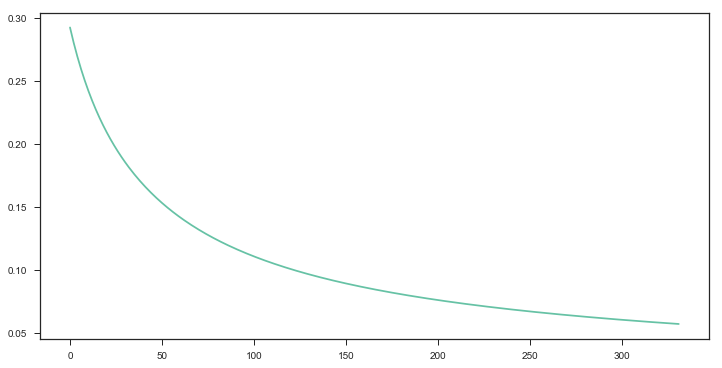

In [29]:
# plot loss against number of iterations

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.plot(range(len(losses)), losses)
plt.show()

- <b>Step 5</b>

  - Calculate the classification evaluation metrics (precision, recall, f1, and accuracy) when applying your model on the test data

In [31]:
# Step 5
from sklearn.metrics.classification import classification_report, accuracy_score

y_pred = 1/(1 + np.exp(-np.dot(X_test, np.array(current_theta))))
y_pred[np.where(y_pred >= 0.5)[0]] = 1
y_pred[np.where(y_pred < 0.5)[0]] = 0

print(classification_report(y_pred, y_test))
accuracy = accuracy_score(y_pred, y_test)
print('accuracy: %.1f%%' % (accuracy * 100.0))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         8
        1.0       1.00      1.00      1.00        22

avg / total       1.00      1.00      1.00        30

accuracy: 100.0%
